In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
from os import listdir
from os.path import isfile, join

path = r"/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/results/backprop1000/data_size"
files = [f for f in listdir(path) if isfile(join(path, f))]
files.sort()
files.pop(-1)
files

['log_method_val_100.log',
 'log_method_val_1000.log',
 'log_method_val_200.log',
 'log_method_val_300.log',
 'log_method_val_400.log',
 'log_method_val_50.log',
 'log_method_val_500.log',
 'log_method_val_600.log',
 'log_method_val_700.log',
 'log_method_val_800.log',
 'log_method_val_900.log']

In [43]:
def _sigmoid(value, steepness=1, scaling=1):
    return scaling / (1 + np.exp(-steepness * value))


params_to_J = lambda x: _sigmoid(x, 1, 100)
params_to_P = lambda x: _sigmoid(x, 1, 1)
params_to_w = lambda x: _sigmoid(x, 1, 180)


def mean_list_to_values(mean_list):
    return [params_to_J(mean_list[0]), params_to_J(mean_list[1]), params_to_J(mean_list[2]), params_to_J(mean_list[3]), 
            params_to_P(mean_list[4]), params_to_P(mean_list[5]), params_to_P(mean_list[6]), params_to_P(mean_list[7]),  
            params_to_w(mean_list[8]), params_to_w(mean_list[9]), params_to_w(mean_list[10]), params_to_w(mean_list[11])]

In [18]:
losses = []
sample_sizes = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

for filename, size in zip(files, sample_sizes):
    loss = []
    with open(f"{path}/log_method_val_{size}.log", "r") as f:
        for line in f:
            words = line.split(" ")
            if words[0] == "loss:":
                loss.append(float(words[1]))
    losses.append(loss)

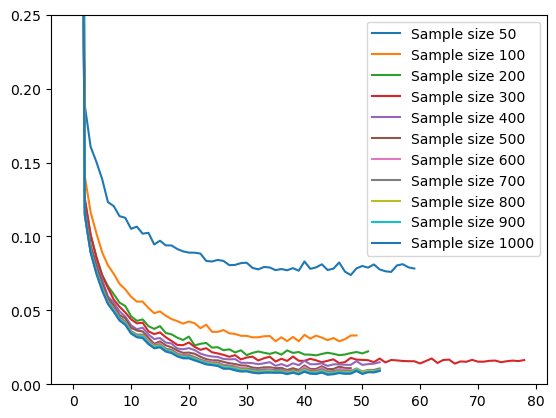

In [19]:
for loss, size in zip(losses, sample_sizes):
    plt.plot(loss, label=f"Sample size {size}")
plt.ylim(0, 0.25)
plt.legend()
plt.show()

In [58]:
minimas_params = [[-3.218628, -3.933511, -1.174266, -1.234903, -2.659001, -1.518347, -0.969763, 0.708623, -2.323526, -1.665554, -0.817628, -0.183084],
            [-3.221786, -3.932365, -1.172538, -1.239925, -2.66091, -1.517495, -0.967665, 0.707468, -2.325328, -1.664723, -0.82691, -0.180438],
            [-3.188166, -3.943996, -1.129386, -1.27936, -2.627008, -1.527394, -0.930904, 0.680774, -2.289257, -1.676373, -0.82837, -0.185803],
            [-3.219942, -3.932152, -1.170464, -1.242673, -2.659836, -1.51729, -0.96596, 0.706302, -2.324133, -1.664401, -0.839455, -0.17716],
            [-3.201051, -3.93818, -1.150246, -1.262721, -2.641104, -1.522342, -0.948684, 0.692106, -2.305184, -1.670131, -0.826694, -0.184147],
            [-3.20935, -3.938882, -1.161339, -1.248952, -2.647298, -1.523139, -0.958703, 0.700393, -2.31046, -1.67146, -0.829947, -0.181282],
            [-3.203642, -3.933478, -1.140253, -1.273028, -2.641538, -1.518631, -0.940123, 0.685979, -2.304712, -1.66649, -0.824478, -0.186092],
            [-3.206426, -3.937387, -1.155492, -1.256044, -2.64468, -1.521869, -0.953558, 0.696232, -2.308164, -1.669922, -0.834697, -0.180993],
            [-3.204458, -3.937143, -1.152352, -1.260337, -2.643374, -1.521583, -0.950643, 0.693664, -2.306645, -1.66965, -0.830653, -0.182704],
            [-3.206369, -3.937628, -1.156463, -1.25574, -2.644824, -1.52204, -0.954336, 0.696473, -2.308064, -1.67018, -0.83296, -0.181446],
            [-3.206323, -3.937451, -1.155134, -1.25639, -2.644739, -1.521898, -0.953163, 0.69608, -2.307989, -1.67003, -0.834904, -0.180926]]

minimas_values = []
for minimas in minimas_params:
    minimas_values.append(mean_list_to_values(minimas))

In [60]:
minimas_array = np.array(minimas_values)
minimas_array = minimas_array.transpose((1, 0))

In [84]:
ground_truth_values = [[11.31, 4.52, 16.97, 5.66],
                        [0.11, 0.45, 0.11, 0.45],
                        [32, 32, 32, 32]]

ValueError: 'x' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

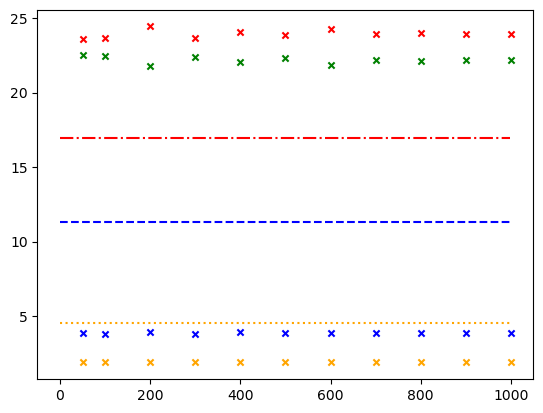

In [95]:
connection_types = ["EE", "EI", "IE", "II"]
parameters = ["J", "P", "w"]
parameter_index = [[0,4], [4,8], [8, 12]]
colors = ["blue", "orange", "red", "green"]
line_style = ['-', '--', ':', '-.']

for parameter, index, ground_truth_value in zip(parameters, parameter_index, ground_truth_values):
    for subarray, connection_type, color in zip(minimas_array[index[0]:index[1]], connection_types, colors):
        plt.scatter(sample_sizes, subarray, marker="x", s=20, label=connection_type, color=color)
    for i in range(4):
        x_values = range(0, 1000)
        y_values = [ground_truth_value[i]] * len(x_values)
        plt.plot(x_values, y_values, color=colors[i], linestyle=line_style[i])

    plt.title(f"Parameter {parameter}")
    plt.xticks(sample_sizes)
    plt.legend()
    plt.xlabel("Sample size")
    plt.ylabel("Parameter value")
    plt.show()